In [1]:
import pandas as pd
r = pd.read_csv(r'Sample_1.csv')

In [13]:
r.columns

Index(['p_id', 'age', 'female', 'ethnicity', 'grip', 'chest', 'e_anx_1',
       'e_anx_2', 'e_anx_3', 'e_anx_4', 'e_anx_5', 'e_anx_6', 'e_anx_7',
       'e_anx_8', 'e_anx_9', 'e_anx_10', 'e_dep_1', 'e_dep_2', 'e_dep_3',
       'e_dep_4', 'e_dep_5', 'e_dep_6', 'e_dep_7', 'e_dep_8', 'e_dep_9',
       'e_dep_10', 'e_fear_1', 'e_fear_2', 'e_fear_3', 'e_fear_4', 'e_fear_5',
       'e_fear_6', 'e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10', 'e_sen_1',
       'e_sen_2', 'e_sen_3', 'e_sen_4', 'e_sen_5', 'e_sen_6', 'e_sen_7',
       'e_sen_8', 'e_sen_9', 'e_sen_10'],
      dtype='object')

In [3]:
mean_anx = r[['e_anx_1', 'e_anx_2', 'e_anx_3','e_anx_4', 'e_anx_5', 'e_anx_6','e_anx_7', 'e_anx_8', 'e_anx_9', 'e_anx_10']].mean(axis=1)
mean_dep = r[['e_dep_1', 'e_dep_2', 'e_dep_3','e_dep_4', 'e_dep_5', 'e_dep_6','e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10']].mean(axis=1)
mean_fear = r[['e_fear_1', 'e_fear_2', 'e_fear_3','e_fear_4', 'e_fear_5', 'e_fear_6','e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10']].mean(axis=1)
mean_sen = r[['e_sen_1', 'e_sen_2', 'e_sen_3','e_sen_4', 'e_sen_5', 'e_sen_6','e_sen_7', 'e_sen_8', 'e_sen_9', 'e_sen_10']].mean(axis=1)

In [10]:
r['mean_anx']=mean_anx
r['mean_dep']=mean_dep
r['mean_fear']=mean_fear
r['mean_sen']=mean_sen

In [13]:
to_drop = ['e_anx_1', 'e_anx_2', 'e_anx_3','e_anx_4', 'e_anx_5', 'e_anx_6','e_anx_7', 'e_anx_8', 'e_anx_9', 'e_anx_10',\
          'e_dep_1', 'e_dep_2', 'e_dep_3','e_dep_4', 'e_dep_5', 'e_dep_6','e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10',\
          'e_fear_1', 'e_fear_2', 'e_fear_3','e_fear_4', 'e_fear_5', 'e_fear_6','e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10',\
          'e_sen_1', 'e_sen_2', 'e_sen_3','e_sen_4', 'e_sen_5', 'e_sen_6','e_sen_7', 'e_sen_8', 'e_sen_9', 'e_sen_10']
r.drop(columns=to_drop, inplace=True)

<AxesSubplot:>

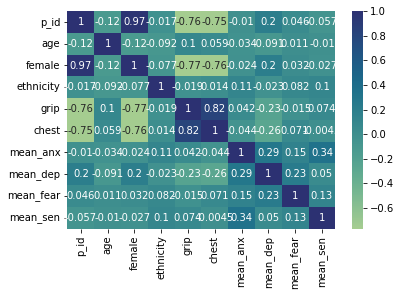

In [15]:
from scipy.stats import pearsonr
import seaborn as sns
correlation = r.corr()
sns.heatmap(correlation, annot=True, cmap="crest")


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r.dropna(inplace=True)

dependent_variable = "mean_fear"
independent_variables = [feature for feature in list(r.columns) if feature != dependent_variable]

X = r[independent_variables]
y = r[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2:", r2)

Mean Squared Error: 0.3173504285714284
Mean Absolute Error: 0.4395714285714284
R^2: -0.14656484103108536


<AxesSubplot:>

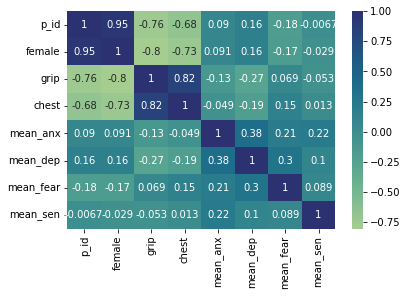

In [16]:
r2 = pd.read_csv(r'Sample_2.csv')

mean_anx = r2[['e_anx_1', 'e_anx_2', 'e_anx_3','e_anx_4', 'e_anx_5', 'e_anx_6','e_anx_7', 'e_anx_8', 'e_anx_9', 'e_anx_10']].mean(axis=1)
mean_dep = r2[['e_dep_1', 'e_dep_2', 'e_dep_3','e_dep_4', 'e_dep_5', 'e_dep_6','e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10']].mean(axis=1)
mean_fear = r2[['e_fear_1', 'e_fear_2', 'e_fear_3','e_fear_4', 'e_fear_5', 'e_fear_6','e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10']].mean(axis=1)
mean_sen = r2[['e_sen_1', 'e_sen_2', 'e_sen_3','e_sen_4', 'e_sen_5', 'e_sen_6','e_sen_7', 'e_sen_8', 'e_sen_9', 'e_sen_10']].mean(axis=1)

r2['mean_anx']=mean_anx
r2['mean_dep']=mean_dep
r2['mean_fear']=mean_fear
r2['mean_sen']=mean_sen

r2.drop(columns=to_drop, inplace=True)
correlation = r2.corr()
sns.heatmap(correlation, annot=True, cmap="crest")

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2.dropna(inplace=True)

dependent_variable = "mean_fear"
independent_variables = [feature for feature in list(r2.columns) if feature != dependent_variable]

X = r2[independent_variables]
y = r2[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2:", r2)

Mean Squared Error: 0.14984999999999996
Mean Absolute Error: 0.31809523809523793
R^2: 0.09125618811881209
